In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amrut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amrut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amrut\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
df = pd.read_csv("karriere_ML.csv")
df.head()

,Unnamed: 0,title,text,url
0,0,Praktikant im Bereich Machine Learning (w/m/x)...,Erfolg ist Teamarbeit. Nur wenn Expert:innen i...,https://www.karriere.at/jobs/6573326
1,1,Machine Learning Engineer (m/wd) bei KNAPP AG ...,Machine Learning Engineer (m/wd) #yourmission ...,https://www.karriere.at/jobs/6611789
2,2,Python/Linux Developer Machine Learning (m/w/d...,Python/Linux Developer Machine Learning (m/w/d...,https://www.karriere.at/jobs/6351146
3,3,Data Scientist - Machine Learning for construc...,STRABAG Innovation & Digitalisation Data Scien...,https://www.karriere.at/jobs/6517844
4,4,Requirements Engineer Machine Learning/AI (w/m...,﹟#mehrwertgeber Requirements Engineer Machine ...,https://www.karriere.at/jobs/6582098


In [39]:
df.shape

(141, 4)

In [40]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText 

In [41]:
df['cleaned_re'] = df['text'].apply(lambda x:cleanDescription(x))
df.head() 

,Unnamed: 0,title,text,url,cleaned_re
0,0,Praktikant im Bereich Machine Learning (w/m/x)...,Erfolg ist Teamarbeit. Nur wenn Expert:innen i...,https://www.karriere.at/jobs/6573326,erfolg ist teamarbeit nur wenn expert innen ih...
1,1,Machine Learning Engineer (m/wd) bei KNAPP AG ...,Machine Learning Engineer (m/wd) #yourmission ...,https://www.karriere.at/jobs/6611789,machine learning engineer m wd als teil unsere...
2,2,Python/Linux Developer Machine Learning (m/w/d...,Python/Linux Developer Machine Learning (m/w/d...,https://www.karriere.at/jobs/6351146,python linux developer machine learning m w d ...
3,3,Data Scientist - Machine Learning for construc...,STRABAG Innovation & Digitalisation Data Scien...,https://www.karriere.at/jobs/6517844,strabag innovation digitalisation data scienti...
4,4,Requirements Engineer Machine Learning/AI (w/m...,﹟#mehrwertgeber Requirements Engineer Machine ...,https://www.karriere.at/jobs/6582098,﹟ requirements engineer machine learning ai w ...


In [42]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [43]:
df['cleaned_text'] = df['cleaned_re'].apply(lambda x:text_clean_2(x))
df.head(2)

,Unnamed: 0,title,text,url,cleaned_re,cleaned_text
0,0,Praktikant im Bereich Machine Learning (w/m/x)...,Erfolg ist Teamarbeit. Nur wenn Expert:innen i...,https://www.karriere.at/jobs/6573326,erfolg ist teamarbeit nur wenn expert innen ih...,erfolg ist teamarbeit nur wenn expert innen ih...
1,1,Machine Learning Engineer (m/wd) bei KNAPP AG ...,Machine Learning Engineer (m/wd) #yourmission ...,https://www.karriere.at/jobs/6611789,machine learning engineer m wd als teil unsere...,machine learning engineer wd al teil unseres t...


In [44]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['abhängig', 'unterstützung', 'möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung', '•','berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence1 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence1))

Old length:  423026
New length:  294424


# Running the Banking  File

In [45]:
df_bk = pd.read_csv("karriere_banking.csv")
df_bk.head()

,Unnamed: 0,title,text,url
0,0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,https://www.karriere.at/jobs/6626390
1,1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,https://www.karriere.at/jobs/6612797
2,2,Intern Corporate Finance Solutions (all gender...,Working at Erste Group means pursuing a common...,https://www.karriere.at/jobs/6577136
3,3,Consultant (m/w/d) Corporate Finance /Transakt...,Für unseren Standort in Graz suchen wir Sie Co...,https://www.karriere.at/jobs/6486356
4,4,Business Development Manager for Supply Chain ...,"""I think coming together is the first step in ...",https://www.karriere.at/jobs/6559868


In [46]:
df_fn = pd.read_csv("karriere_finance.csv")
df_fn.head()

,Unnamed: 0,title,text,url
0,0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,https://www.karriere.at/jobs/6626390
1,1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,https://www.karriere.at/jobs/6612797
2,2,Intern Corporate Finance Solutions (all gender...,Working at Erste Group means pursuing a common...,https://www.karriere.at/jobs/6577136
3,3,Consultant (m/w/d) Corporate Finance /Transakt...,Für unseren Standort in Graz suchen wir Sie Co...,https://www.karriere.at/jobs/6486356
4,4,Business Development Manager for Supply Chain ...,"""I think coming together is the first step in ...",https://www.karriere.at/jobs/6559868


In [47]:
df_1 = [df_bk, df_fn]
df_1 = pd.concat([df_bk, df_fn], ignore_index=True, sort=False)

In [48]:
df_1=df_1.drop("url", axis='columns')

In [49]:
df_1=df_1.drop("Unnamed: 0", axis='columns')

In [50]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText

In [51]:
df_1['cleaned_re'] = df_1['text'].apply(lambda x:cleanDescription(x))
df_1.head() 

,title,text,cleaned_re
0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,we create smart innovations to meet the mobili...
1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,die pegasos finance gmbh ist eines der führend...
2,Intern Corporate Finance Solutions (all gender...,Working at Erste Group means pursuing a common...,working at erste group means pursuing a common...
3,Consultant (m/w/d) Corporate Finance /Transakt...,Für unseren Standort in Graz suchen wir Sie Co...,für unseren standort in graz suchen wir sie co...
4,Business Development Manager for Supply Chain ...,"""I think coming together is the first step in ...",i think coming together is the first step in ...


In [52]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [53]:
df_1['cleaned_text'] = df_1['cleaned_re'].apply(lambda x:text_clean_2(x))
df_1.head(2)

,title,text,cleaned_re,cleaned_text
0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,we create smart innovations to meet the mobili...,create smart innovation meet mobility challeng...
1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,die pegasos finance gmbh ist eines der führend...,die pegasos finance gmbh ist eines der führend...


In [54]:
df_1=df_1.drop("cleaned_re", axis='columns')
df_1

,title,text,cleaned_text
0,Finance Project Manager bei ALSTOM Transport A...,We create smart innovations to meet the mobili...,create smart innovation meet mobility challeng...
1,Junior Privatkundenberater:in im Innendienst/A...,Die Pegasos Finance Gmbh ist eines der führend...,die pegasos finance gmbh ist eines der führend...
2,Intern Corporate Finance Solutions (all gender...,Working at Erste Group means pursuing a common...,working erste group mean pursuing common goal ...
3,Consultant (m/w/d) Corporate Finance /Transakt...,Für unseren Standort in Graz suchen wir Sie Co...,für unseren standort graz suchen wir sie consu...
4,Business Development Manager for Supply Chain ...,"""I think coming together is the first step in ...",think coming together first step working toget...
...,...,...,...
1683,(Junior) Legal Counsel - Media and Marketing b...,Full-time\t (Junior) Legal Counsel - Media and...,full time junior legal counsel medium marketin...
1684,Internship Project Management (all genders) #w...,We are part of Erste Group – the largest banki...,part erste group – largest banking group centr...
1685,BuchhalterIn für nachhaltiges Unternehmen – fl...,"Du bist digitalaffin, smarte Technologien bege...",du bist digitalaffin smarte technologien begei...
1686,(Senior-) Underwriter I Casualty CSEE (m/w/d) ...,(Senior-) Underwriter I Casualty CSEE (m/w/d) ...,senior underwriter casualty csee w permanent p...


In [55]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
 
stop_words = stopwords.words('german')
df_1['text_woStopwords'] = df_1['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
df_1=df_1.drop("title", axis='columns')
df_1=df_1.drop("text", axis='columns')
df_1=df_1.drop("cleaned_text", axis='columns')
df_1.head(2)

,text_woStopwords
0,create smart innovation meet mobility challeng...
1,pegasos finance gmbh führenden unabhängigen fi...


In [57]:
cell_text = print(df_1["text_woStopwords"].values[3])
print(cell_text)

standort graz suchen consultant w corporate finance transaktionsberatung rabelpartner aufgaben eingespielten team eingebettet leisten wertvolle beiträge lösung betriebswirtschaftlichen fragestellungen kunden insbesondere jahresabschluss planungs markt wettbewerbsanalysen sowie erstellung financial model dadurch tragen kunden sensiblen entscheidungen bestmöglich unterstützen schwerpunkt unserer beratung liegt unternehmensbewertungen sanierungen unternehmenstransaktionen lernbereitschaft enge zusammenarbeit erfahrenen kolleg innen steile lernkurve durchlaufen weitere karriereschritte ermöglichen profil abgeschlossenes einschlägiges bachelor masterstudium gute m office kenntnisse angebot mitarbeit hochmotivierten jungen team sichere berufliche perspektive flexible arbeitszeitmodelle attraktives karrieremodell weitreichende unterstützung finanzierung au fortbildungen mentorenprogramm ab ersten arbeitstag ausgezeichnetes betriebsklima hochmoderner unternehmensstandort guter öffentlicher ver

In [58]:
df.shape

(141, 6)

In [60]:
#getting the entire resume text
Bank_corpus=" "
for i in range(0,141):
    Bank_corpus= Bank_corpus+ df_1["text_woStopwords"][i]

In [61]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = Bank_corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence2 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence2 ))

Old length:  320185
New length:  255146


In [62]:
def common_words(sentence1, sentence2):
    # split the sentences into lists of words
    words1 = sentence1.split()
    words2 = sentence2.split()
    
    # use set intersection to get the common words
    common = set(words1).intersection(words2)
    
    # convert the set back to a list and return it
    return list(common)

# print(common_words(sentence1, sentence2))
Common_words = common_words(sentence1, sentence2)
Common_words

['produktionsstandorte',
 'mm',
 'umfassende',
 'kultur',
 'stelle',
 'umfassenden',
 'natürlich',
 'spotfire',
 'selbstverständlich',
 'zuständigkeiten',
 'schnellen',
 'essfully',
 'teammitglied',
 'herr',
 'schau',
 'montage',
 'nr',
 'überdurchschnittliche',
 'einsatzbereitschaft',
 'geschäft',
 'recruitment',
 'technisches',
 'etablierten',
 'fluently',
 'betting',
 'reisetätigkeit',
 'treatment',
 'trip',
 'wirtschaftlich',
 'wirtschaftliche',
 'begleitest',
 'organic',
 'gehaltsvorstellungen',
 'dienstzeugnissen',
 'ausgerichtet',
 'weltanschauung',
 'supply',
 'bestehend',
 'iban',
 'make',
 'hinsicht',
 'founded',
 'mealsattractive',
 'nutrition',
 'betrieblichen',
 'comsenior',
 'fachlicher',
 'gesundheitsmaßnahmen',
 'unabhängig',
 'medical',
 'vertreten',
 'teleworking',
 'jungen',
 'either',
 'infrastructure',
 'match',
 'extra',
 'führung',
 'diversified',
 'able',
 'weit',
 'zeichnen',
 'safe',
 'erfährst',
 'anlaufstelle',
 'trust',
 'geweckt',
 'meet',
 'motiviertes',


In [82]:
UnwantedWords = ['abhängig', 'unterstützung', 'möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung']
sw_nltk.extend(Common_words)
sw_nltk.extend(UnwantedWords)
(Common_words)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
NewCleanedText = " ".join(words)

#print(new_text)
print("Old length: ", len(sentence1))
print("New length: ", len(NewCleanedText))

Old length:  294424
New length:  90515


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(NewCleanedText)

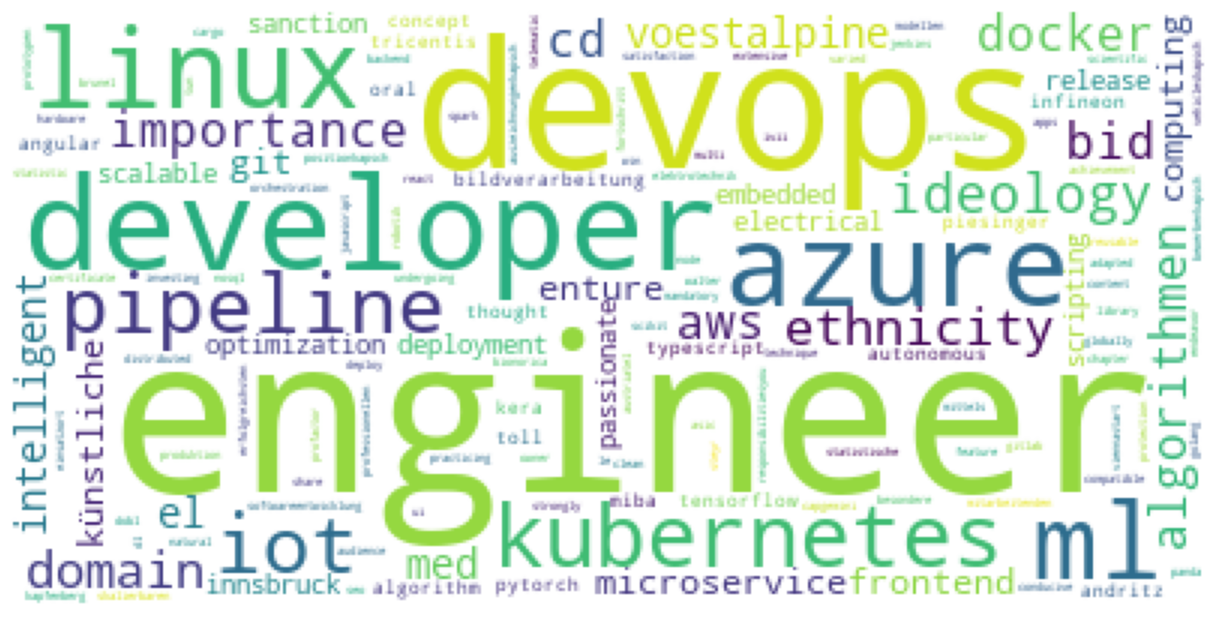

In [84]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [85]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = nltk.word_tokenize(NewCleanedText)
#tokens = tokenizer.tokenize(corpus)
len(NewCleanedText)

90515

In [86]:
freq_dist = nltk.FreqDist(tokens)
mostcommon = freq_dist.most_common(1000)
mostcommon

[('engineer', 67),
 ('devops', 42),
 ('developer', 36),
 ('azure', 29),
 ('linux', 26),
 ('ml', 25),
 ('kubernetes', 24),
 ('pipeline', 23),
 ('iot', 23),
 ('ideology', 21),
 ('ethnicity', 21),
 ('domain', 20),
 ('importance', 20),
 ('algorithmen', 19),
 ('docker', 19),
 ('aws', 18),
 ('bid', 18),
 ('cd', 17),
 ('voestalpine', 17),
 ('intelligent', 16),
 ('med', 16),
 ('el', 16),
 ('git', 16),
 ('enture', 16),
 ('künstliche', 15),
 ('computing', 15),
 ('frontend', 15),
 ('optimization', 15),
 ('sanction', 15),
 ('innsbruck', 14),
 ('embedded', 13),
 ('microservices', 13),
 ('passionate', 13),
 ('scalable', 13),
 ('electrical', 13),
 ('release', 12),
 ('deployment', 12),
 ('scripting', 12),
 ('bildverarbeitung', 12),
 ('typescript', 12),
 ('angular', 12),
 ('piesinger', 12),
 ('algorithm', 12),
 ('infineon', 12),
 ('oral', 12),
 ('concept', 11),
 ('andritz', 11),
 ('miba', 11),
 ('toll', 11),
 ('autonomous', 11),
 ('thought', 11),
 ('tricentis', 11),
 ('pytorch', 10),
 ('kera', 10),
 ('

### END

In [88]:
  import pandas as pd

# Sample sentence
sentence = NewCleanedText

# Split the sentence into words
words = sentence.split()

# Calculate the number of rows required
num_rows = (len(words) + 199) // 200

# Create a DataFrame with the required number of rows
df_Words = pd.DataFrame({'Words': ['']*num_rows})

# Populate each row of the DataFrame with up to 200 words
for i in range(num_rows):
    start_index = i * 200
    end_index = min((i+1) * 200, len(words))
    df_Words.iloc[i] = ' '.join(words[start_index:end_index])

# Print the resulting DataFrame
print(df_Words)

                                                Words
0   fachwissen entsteht fließen nennen innovations...
1   softwareprodukten zukunftsweisenden zielführen...
2   pipeline produktreifen ml bildverarbeitungsapp...
3   übergabe forschungsergebnisse softwarelandscha...
4   andritz anzuführen »job gehaltsrahmen datenpla...
5   backend bilden produktfeatures weiterentwickel...
6   runtime optimization tecnomatix processsimulat...
7   milliarden xxxlutz möbelhändlern xxxldigital m...
8   erfüllen produktiven ml dl modellen forschungs...
9   gitlab dockerexperience toll telematics prefer...
10  bewerbenworking sanction sanction corresponden...
11  assessment round invitation spam regularly thu...
12  environmentability overcome problemsour offerc...
13  deploy reusable testscontributing designyou st...
14  odermachine datenmodellierungumfangreiche appl...
15  bechtle mitarbeitenden erfolgreichsten direktv...
16  notch ux teammate share clear opinion run expe...
17  leistungslevel heben mod

In [91]:
df_Words.to_csv('MLoutput1.csv', index=False)